In [1]:
from warnings import simplefilter

import jax
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt


simplefilter(action="ignore", category=FutureWarning)

from diffrax import (
    ControlTerm,
    diffeqsolve,
    MultiTerm,
    SaveAt,
    SemiLinearTerm,
    SemiSEA,
    SemiShARK,
    ShARK,
    SpaceTimeLevyArea,
    VirtualBrownianTree,
)


jax.config.update("jax_enable_x64", True)

y0 = jnp.array([1.0, 1.0])
t0, t1 = 0.0, 10.0
dt0 = 0.01

vbt = VirtualBrownianTree(t0, t1, dt0 / 2, (2,), jr.key(0), SpaceTimeLevyArea)


def diffusion_vf(t, y, args):
    return jnp.eye(2)


diffusion = ControlTerm(diffusion_vf, vbt)

# f = -y
When drift_f is not 0, the solution given by SemiShARK is not the same as that of ShARK.

In [7]:
def drift_f(t, y, args):
    return -1.0 * y


drift = SemiLinearTerm(gamma=-0.5, f=drift_f)
semi_terms = MultiTerm(drift, diffusion)
ode_term = drift.to_ode()
normal_terms = MultiTerm(ode_term, diffusion)

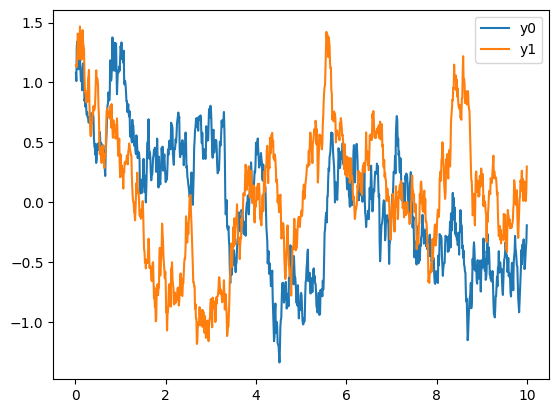

In [3]:
sol_semi_shark = diffeqsolve(
    semi_terms, SemiShARK(), t0, t1, dt0, y0, None, saveat=SaveAt(steps=True)
)

# plot the solution
plt.plot(sol_semi_shark.ts, sol_semi_shark.ys[:, 0], label="y0")
plt.plot(sol_semi_shark.ts, sol_semi_shark.ys[:, 1], label="y1")
plt.legend()
plt.show()

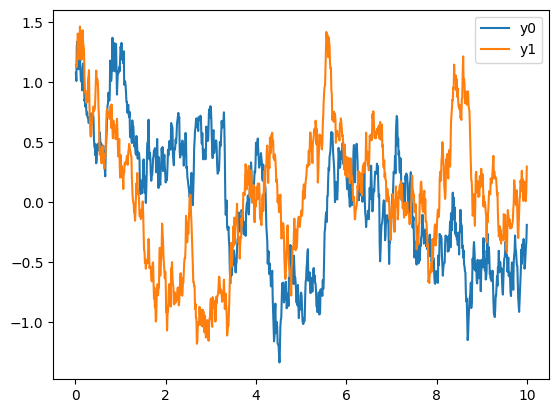

In [4]:
sol_semi_sea = diffeqsolve(
    semi_terms, SemiSEA(), t0, t1, dt0, y0, None, saveat=SaveAt(steps=True)
)

# plot the solution
plt.plot(sol_semi_sea.ts, sol_semi_sea.ys[:, 0], label="y0")
plt.plot(sol_semi_sea.ts, sol_semi_sea.ys[:, 1], label="y1")
plt.legend()
plt.show()

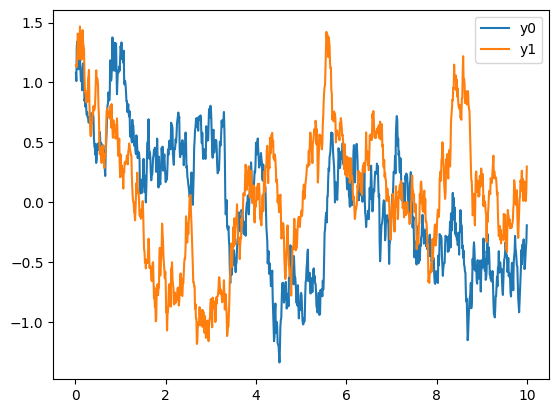

In [5]:
sol_shark = diffeqsolve(
    normal_terms, ShARK(), t0, t1, dt0, y0, None, saveat=SaveAt(steps=True)
)

# plot the solution
plt.plot(sol_shark.ts, sol_shark.ys[:, 0], label="y0")
plt.plot(sol_shark.ts, sol_shark.ys[:, 1], label="y1")
plt.legend()
plt.show()

# Computing solver order